# Pandas 4

Alberto Quaini - I thank Rebeka and Natasha for helping me jump some hurdles.

### Import libraries

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

## Problem 1

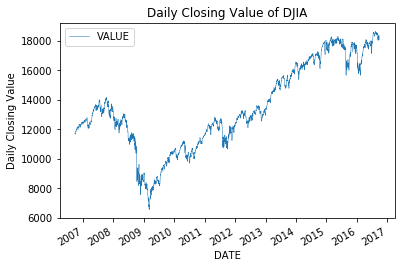

In [9]:
djia = pd.read_csv("DJIA.csv")
djia.index = pd.to_datetime(djia["DATE"], format="%Y-%m-%d")
djia = djia.drop(columns = "DATE")
djia = djia[djia["VALUE"] != "."]
djia["VALUE"] = djia["VALUE"].apply(pd.to_numeric, errors='ignore')
djia.plot(y = "VALUE", lw = 0.5)
plt.ylabel("Daily Closing Value")
plt.title("Daily Closing Value of DJIA")
plt.show()

## Problem 2

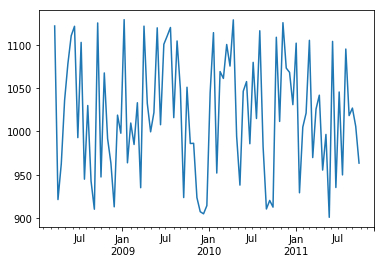

In [10]:
paychecks = pd.read_csv("paychecks.csv", squeeze=True, header=None)
paychecks.index = pd.date_range(start='2008/3/21', periods=93, freq="2W-FRI")
paychecks.plot()
plt.show()

## Problem 3

In [11]:
finances = pd.read_csv('finances.csv')

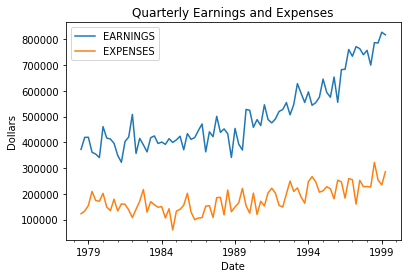

In [13]:
p = pd.period_range(start="1978-09", periods=len(finances), freq="Q-DEC")
finances.index = p
finances.plot()
plt.xlabel("Date")
plt.ylabel("Dollars")
plt.title("Quarterly Earnings and Expenses")
plt.show()

## Problem 4

In [14]:
websites = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'], index_col=1)

In [15]:
websites['DURATION'] = (websites.LEAVE - websites.index).dt.seconds

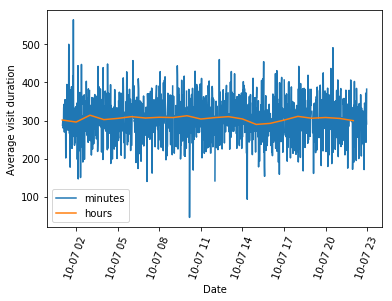

In [19]:
fig, ax = plt.subplots()

web_traf = pd.read_csv("website_traffic.csv")
web_traf["LEAVE"] = pd.to_datetime(web_traf["LEAVE"])
web_traf["ENTER"] = pd.to_datetime(web_traf["ENTER"])
web_traf["Duration"] = (web_traf["LEAVE"] - web_traf["ENTER"]).dt.seconds
minutes = web_traf.set_index('ENTER')['Duration']
ax.plot(minutes.resample('T').mean(), label="minutes")
hours = web_traf.set_index('ENTER')['Duration']
ax.plot(hours.resample('H').mean(), label="hours")
plt.legend()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Average visit duration")
plt.show()

## Problem 5

In [20]:
dayGains = djia.diff(periods=1) # gain/loss of each day

# Single day with the largest gain
print(dayGains["VALUE"].idxmax())

2008-10-13 00:00:00


In [21]:
# Single day with the largest lost
print(dayGains["VALUE"].idxmin())

2008-09-29 00:00:00


In [22]:
# group the data by month
months = djia.resample("M").first() # levels at the first day of each month
monthGains = months.diff() # gain/loss of each month 

# Month with the larget gain
print(monthGains["VALUE"].idxmax())

2015-11-30 00:00:00


In [23]:
# Month with the larget lost
print(monthGains["VALUE"].idxmin())

2015-09-30 00:00:00


## Problem 6

In [45]:
windows = [30, 120, 365]

def plot_djia_window(w):

    fig, ax = plt.subplots()
    ax.plot(djia, lw = 0.5)
    djia.rolling(window = w).mean().plot(color = 'r', lw = 1, ax = ax)
    djia.rolling(window = w).min().plot(color = 'b', lw = 1, ax = ax)
    djia.rolling(window = w).max().plot(color = 'g', lw = 1, ax = ax)
    djia.ewm(span = w).mean().plot(color = 'b', lw = 1, ax = ax)
    ax.legend(["Actual", "Rolling: Average", "Rolling: Minimum", "Rolling: Maximum", "Exponential"], loc="lower right")
    plt.title("DJIA, Window Span of %i" %w)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

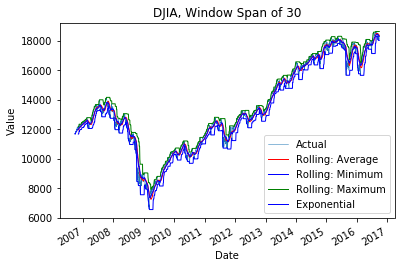

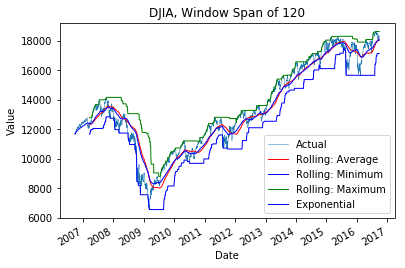

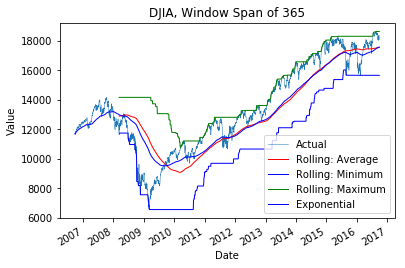

In [46]:
plot_djia_window(windows[0])
plot_djia_window(windows[1])
plot_djia_window(windows[2])